In [1]:
import numpy as np

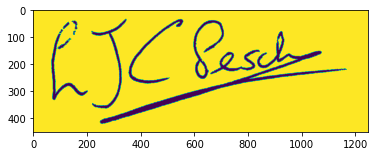

In [2]:
import matplotlib.pyplot as plt
imgForged = plt.imread('./input/sample_Signature/forged/NFI-00301001.png')
plt.imshow(imgForged)

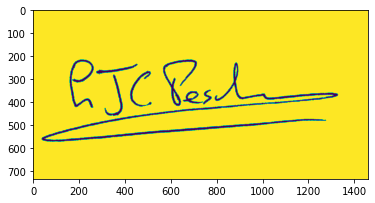

In [3]:
imgGenuine = plt.imread('./input/sample_Signature/genuine/NFI-00101001.png')
plt.imshow(imgGenuine)

### we create two list to store all genuine and forged sign respectively

In [4]:
import glob

genuine = [glob.glob('./input/Dataset/dataset1/real/*.*'),
       glob.glob('./input/Dataset/dataset2/real/*.*'),
       glob.glob('./input/Dataset/dataset3/real/*.*'),
       glob.glob('./input/Dataset/dataset4/real1/*.*')]
                 
forged = [glob.glob('./input/Dataset/dataset1/forge/*.*'),
        glob.glob('.input/Dataset/dataset2/forge/*.*'),
        glob.glob('./input/Dataset/dataset3/forge/*.*'),
        glob.glob('./input/Dataset/dataset4/forge/*.*')]


### The first 3 datasets are used for training and the 4th dataset is used for testing

In [5]:
import keras
import cv2


train_data = []
train_labels = []

test_data = []
test_labels = []

for data in range(len(genuine)):
    for i in genuine[data]:
        if data == 3:
            image = cv2.imread(i)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (512, 512))
            test_data.append(image)
            test_labels.append(0)
        else:
            image = cv2.imread(i)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (512, 512))
            train_data.append(image)
            train_labels.append(0)
        
for data in range(len(forged)):
    for j in forged[data]:
        if data == 3:
            image = cv2.imread(j)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (512, 512))
            test_data.append(image)
            test_labels.append(1)
        else:
            image = cv2.imread(j)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (512, 512))
            train_data.append(image)
            train_labels.append(1)

train_data = np.array(train_data)/255.0
train_labels = np.array(train_labels)

test_data = np.array(test_data)/255.0
test_labels = np.array(test_labels)


In [6]:
train_data.shape

(480, 512, 512, 3)

In [7]:
from sklearn.utils import shuffle
train_data,train_labels = shuffle(train_data,train_labels)

test_data,test_labels = shuffle(test_data,test_labels)

### preprocessing and building the model

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda, MaxPooling2D, Conv2D, Dropout, BatchNormalization


model = Sequential()

Image_Width = 512
Image_Height = 512
Image_Size = (Image_Width, Image_Height)
Image_Channel = 3


## Conv layer 1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(Image_Width,Image_Height, Image_Channel)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 3
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 4
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 5
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 6
model.add(Conv2D(512, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))
model.add(Flatten())

model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

# model.add(Conv2D(128,(3,3),input_shape=(512,512,3),activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(3,3))

# model.add(Conv2D(64,(3,3),input_shape=(512,512,3),activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(3,3))


# model.add(Conv2D(32,(3,3),activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(3,3))


# model.add(Flatten())
# model.add(Dense(128,activation = 'relu'))
# model.add(Dropout(rate=0.3))
# model.add(Dense(2,activation = 'softmax'))
# model.add(Flatten())


# model.compile(optimizer=Adam(lr=0.001),loss="binary_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 510, 510, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 255, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 255, 255, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 253, 253, 64)     2

In [9]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

callback_early_stop_reduceLROnPlateau=[earlyStopping]

EPOCHS = 5
BS = 1
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=callback_early_stop_reduceLROnPlateau,validation_split=.05)

Epoch 1/5
456/456 [==============================] - 288s 620ms/step - loss: 0.6931 - accuracy: 0.5702 - val_loss: 4.6338 - val_accuracy: 0.5417
Epoch 2/5
456/456 [==============================] - 310s 680ms/step - loss: 0.6931 - accuracy: 0.5702 - val_loss: 7.3318 - val_accuracy: 0.5000
Epoch 3/5
456/456 [==============================] - 237s 520ms/step - loss: 0.6931 - accuracy: 0.5702 - val_loss: 7.2849 - val_accuracy: 0.5417
Epoch 4/5
456/456 [==============================] - 244s 534ms/step - loss: 0.6931 - accuracy: 0.5702 - val_loss: 7.4110 - val_accuracy: 0.5000
Epoch 4: early stopping


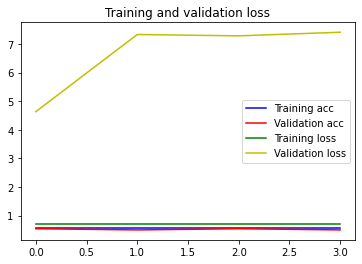

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [10]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [11]:
pred = model.predict(test_data)

In [12]:
pred  #prob of genuine, prob of forged

array([[2.09041881e-10, 1.00000000e+00],
       [5.06151427e-23, 1.00000000e+00],
       [1.18076340e-10, 1.00000000e+00],
       [3.24779862e-32, 1.00000000e+00],
       [6.69516752e-38, 1.00000000e+00],
       [1.71060444e-10, 1.00000000e+00],
       [1.29562577e-25, 1.00000000e+00],
       [5.03114901e-26, 1.00000000e+00],
       [1.00000000e+00, 5.19099087e-12],
       [1.00000000e+00, 1.86962859e-23],
       [5.54839849e-01, 4.45160180e-01],
       [5.12044065e-21, 1.00000000e+00],
       [3.30671200e-13, 1.00000000e+00],
       [4.41354716e-14, 1.00000000e+00],
       [2.44310067e-31, 1.00000000e+00],
       [1.00000000e+00, 8.68589499e-24],
       [1.54629182e-30, 1.00000000e+00],
       [6.19840212e-05, 9.99938011e-01],
       [4.28494786e-08, 1.00000000e+00],
       [1.43908335e-06, 9.99998569e-01],
       [7.42339939e-02, 9.25765991e-01],
       [0.00000000e+00, 1.00000000e+00],
       [1.23529187e-08, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [6.061711

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(pred.argmax(axis=1), test_labels)

0.46111111111111114

In [14]:
from tensorflow.keras.models import load_model

model.save('AI_project_forgery_detection.h5')


In [15]:
network = load_model('AI_project_forgery_detection.h5')

### testing the model against a random input

In [17]:
from tensorflow.keras.preprocessing import image

img = image.load_img('./input/Dataset/dataset1/real/00100001.png', target_size=(512,512))

In [18]:
x = image.img_to_array(img)

In [19]:
x.shape

(512, 512, 3)

In [20]:
x = x/255

from tensorflow.keras.applications.resnet50 import preprocess_input

x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 512, 512, 3)

In [21]:
model.predict(img_data)

array([[0., 1.]], dtype=float32)

In [22]:
a=np.argmax(model.predict(img_data), axis=1)

In [23]:
if(a==1):
    print("The signature is genuine")
else:
    print("The signature is fraud")

The signature is genuine
